In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import scanpy as sc
sc.settings.verbosity = 2
import anndata

from readcount_tools import plot_mean_vs, add_largedot_legend
#import plotting constants
from readcount_tools import PAPER_CONTEXT, PAGEWIDTH_IN, SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE,LINEWIDTH,POINTSIZE,TICKLENGTH,LEGEND_FONTSIZE,SPINEWIDTH,LETTER_LOC_X,LETTER_LOC_Y

In [2]:
exp2run = {'CELseq2A':'A',
 'CELseq2B':'B',
 'DropSeqA':'A',
 'DropSeqB':'B',
 'MARSseqA':'A',
 'MARSseqB':'B',
 'SCRBseqA':'A',
 'SCRBseqB':'B',
 'Smartseq3_Fibroblast':'A',
 'Smartseq3_Fibroblast_PE':'A',
 'Smartseq3xpressA':'A'}
exp2prot = {'CELseq2A':'CELseq2',
 'CELseq2B':'CELseq2',
 'DropSeqA':'DropSeq',
 'DropSeqB':'DropSeq',
 'MARSseqA':'MARSseq',
 'MARSseqB':'MARSseq',
 'SCRBseqA':'SCRBseq',
 'SCRBseqB':'SCRBseq',
 'Smartseq3_Fibroblast':'Smartseq3_SE',
 'Smartseq3_Fibroblast_PE':'Smartseq3_PE',
 'Smartseq3xpressA':'Smartseq3xpress'}


In [3]:
### Use all UMI datasets
experiments = ['CELseq2A', 'CELseq2B',
             'DropSeqA', 'DropSeqB', 
             'MARSseqA', 'MARSseqB', 
             'SCRBseqA', 'SCRBseqB', 
              'Smartseq3_Fibroblast',
              'Smartseq3_Fibroblast_PE',
              'Smartseq3xpressA']

basepath = 'data/reads_per_umi_tables/'

adatas_by_exp = []
for exp in experiments:
    fullpath = (f'{basepath}ad_readcounts_umicounts_hd1_{exp}')
    ad = anndata.read_h5ad(fullpath)
    
    #ad.var.set_index('genes',inplace=True)
    ad.obs['experiment'] = ad.uns['experiment']
    ad.obs['index'] = ad.obs['experiment'] + '_' + ad.obs['cells'] 
    ad.obs.set_index('index',inplace=True)
    
    ad.obs['protocol']=[exp2prot[exp] for exp in ad.obs.experiment]
    ad.obs['run']=[exp2run[exp] for exp in ad.obs.experiment]
    
    #filter empty genes/cells within each exp
    sc.pp.filter_genes(ad,min_cells=1)
    sc.pp.filter_genes(ad,min_counts=1) #to override old "all protocol n_counts value"
    sc.pp.filter_cells(ad,min_genes=1)
    
    #compute per-gene statistics within each exp
    ### Readcounts
    variances_reads = np.var(ad.layers['reads'].A,axis=0)
    means_reads = np.squeeze(np.array(np.mean(ad.layers['reads'].A,axis=0)))
    ffs_reads = variances_reads/means_reads
    ### UMI counts
    variances_umis = np.var(ad.X.A,axis=0)
    means_umis = np.squeeze(np.array(np.mean(ad.X.A,axis=0)))
    ffs_umis = variances_umis/means_umis

    #save to adata
    ad.uns['experiment']=exp
    ad.uns['protocol']=exp2prot[exp]
    ad.uns['run']=exp2run[exp]
    
    ad.var['var_reads'] = variances_reads
    ad.var['ff_reads'] = ffs_reads
    ad.var['mean_reads'] = means_reads    
    ad.var['var_umis'] = variances_umis
    ad.var['ff_umis'] = ffs_umis
    ad.var['mean_umis'] = means_umis

    #organize adatas in list
    adatas_by_exp.append(ad)    


In [4]:
adatas_by_exp_short = [ad for ad in adatas_by_exp if ad.uns['run']=='A']
adatas_by_exp_peudogenes_short = [ad[:,ad.var['coarse_types']=='pseudogene'] for ad in adatas_by_exp if ad.uns['run']=='A']

In [5]:
prot2print = dict(CELseq2='CEL-seq2',
                    DropSeq='Drop-seq',
                    MARSseq='MARS-seq',
                    SCRBseq='SCRB-seq',
                    Smartseq3_SE='Smart-seq3 (SE)',
                    Smartseq3_PE='Smart-seq3 (PE)',
                    Smartseq3xpress='Smart-seq3 (Xpress)')
for ad in adatas_by_exp_short:
    ad.uns['protocol_print'] = prot2print[ad.uns['protocol']]

### Fig S3

In [6]:
def plot_mean_ff_highlight_type(adatas_by_run,axes,colorby,highlight,input_axes=None,
                                    xkey='mean',ykey='ff', s=5,
                                    alpha_highlight=0.05, legend_label_highlight = None, highlight_color = 'tab:red'):
        
    for i,(ad,ax) in enumerate(zip(adatas_by_run,axes.flatten())):

        plt.sca(ax)
        highlight_idx = ad.var[colorby] == highlight
        plt.scatter(ad.var[xkey][highlight_idx],ad.var[ykey][highlight_idx],c=highlight_color,linewidth=0,s=s,label=legend_label_highlight,alpha=alpha_highlight,rasterized=True)   
        
        plt.yscale('log')
        plt.xscale('log')
        
        plt.title(ad.uns['protocol'])
                
    sns.despine()
    return axes

tcmalloc: large alloc 4438712320 bytes == 0x2533a000 @ 
tcmalloc: large alloc 4438712320 bytes == 0x12dc50000 @ 
tcmalloc: large alloc 4438712320 bytes == 0x23ee06000 @ 
tcmalloc: large alloc 4438712320 bytes == 0x34771c000 @ 
tcmalloc: large alloc 4438712320 bytes == 0x450832000 @ 
tcmalloc: large alloc 4429291520 bytes == 0x450832000 @ 
tcmalloc: large alloc 4429291520 bytes == 0x23ee06000 @ 
tcmalloc: large alloc 4429291520 bytes == 0x346e20000 @ 
tcmalloc: large alloc 4429291520 bytes == 0x2533a000 @ 
tcmalloc: large alloc 4429291520 bytes == 0x12d354000 @ 
tcmalloc: large alloc 4628766720 bytes == 0x23ee06000 @ 
tcmalloc: large alloc 4628766720 bytes == 0x2533a000 @ 
tcmalloc: large alloc 4628766720 bytes == 0x559148000 @ 
tcmalloc: large alloc 5172264960 bytes == 0x23ee06000 @ 


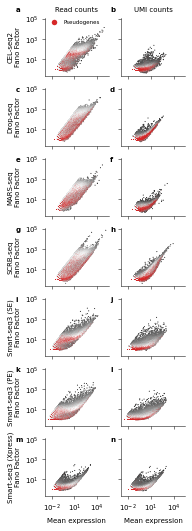

In [7]:
nrows = 7
ncols = 2
pageheight_in = 8.8
figwidth_in = pageheight_in/nrows * ncols
path='figures/S_ziegenhain_pseudogenes.pdf'
with mpl.rc_context(PAPER_CONTEXT):
    fig,axes = plt.subplots(nrows,ncols,figsize=(figwidth_in,pageheight_in),sharex=True,sharey=True)
    axes_readcounts = axes[:,0]
    axes_umicounts =  axes[:,1]

    ###READS
    plot_mean_vs(adatas_by_exp_short,
                 ykey='ff_reads',xkey='mean_reads',s=POINTSIZE,
                 kde_cmap='Greys_r',
                 axes=axes_readcounts)
    ### add red dots on top
    plot_mean_ff_highlight_type(adatas_by_exp_peudogenes_short,axes=axes_readcounts,
                                       colorby='coarse_types',highlight='pseudogene',
                                       legend_label_highlight='Pseudogenes',
                                ykey='ff_reads',xkey='mean_reads',s=POINTSIZE)
    
    ### UMIS
    plot_mean_vs(adatas_by_exp_short,
                 ykey='ff_umis',xkey='mean_umis',s=POINTSIZE,
                 kde_cmap='Greys_r',
                 axes=axes_umicounts)
    ### add red dots on top
    plot_mean_ff_highlight_type(adatas_by_exp_peudogenes_short,axes=axes_umicounts,
                                       colorby='coarse_types',highlight='pseudogene',
                                       legend_label_highlight='Pseudogenes',
                                ykey='ff_umis',xkey='mean_umis',s=POINTSIZE)
    add_largedot_legend(ax=axes_readcounts[0],loc=(0.02,0.85),fix_alpha=True,kwargs=dict(frameon=False,fontsize=LEGEND_FONTSIZE))

    
    for axis in ['bottom','left']:
        [ax.spines[axis].set_linewidth(SPINEWIDTH) for ax in axes.flatten()]
    
    [ax.set_xticks([10**-2,10**1,10**4]) for ax in axes.flatten()]
    
    axes[0,0].set_title('Read counts')
    axes[0,1].set_title('UMI counts')
    [ax.set_title('') for ax in axes[1:,:].flatten()]
    
    
    [ax.set_xlabel('Mean expression') for ax in axes[-1,:].flatten()]
    plt.minorticks_off()
    
    for ax,ad in zip(axes[:,0].flatten(),adatas_by_exp_short):
        ax.set_ylabel(f'{ad.uns["protocol_print"]}\nFano Factor')
    
    letters=['a','b',
             'c','d',
             'e','f',
             'g','h',
             'i','j',
             'k','l',
             'm','n']
    x_l=-0.16
    x_r=0.12
    x_corrections=[x_l, x_r, x_l, x_r, x_l, x_r, x_l, x_r ,x_l, x_r, x_l, x_r, x_l, x_r]
    y_1=0.15
    y_r=-0.02
    y_corrections=[y_1, y_1, y_r, y_r, y_r, y_r, y_r, y_r, y_r, y_r, y_r, y_r, y_r, y_r]
        
    for ax,letter,x_corr,y_corr in zip(axes.flatten(),letters,x_corrections,y_corrections):
        ax.text(LETTER_LOC_X+x_corr,LETTER_LOC_Y+y_corr,letter,transform=ax.transAxes,fontweight='bold')

    plt.savefig(path, dpi=300, format=None, bbox_inches = 'tight', pad_inches = 0)
    plt.show()